In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
from lxml import etree

In [6]:
tree=etree.parse('sample.xml')   # <- xml을 tree구조로 읽음
root=tree.getroot()    # <- root를 읽는 함수

In [9]:
kids=root.getchildren()    # <- 자식들이 읽어짐
kids

[<Element name at 0x1b748430108>,
 <Element members at 0x1b7484301c8>,
 <Element albums at 0x1b748430248>]

In [13]:
members=[]
albums=[]
for child in kids:
    print(child.tag)
    print(child.text)
    if child.tag=='name':
        gname=child.text
    elif child.tag=='members':
        for xmember in child:
            members.append(xmember.text)
    elif child.tag=='albums':
        for xalbum in child:
            albums.append([xalbum.get('order'),xalbum.text])    

name
여자친구
members

    
albums

    


In [14]:
members

['소원', '예린', '은하', '유주', '신비', '엄지']

In [15]:
albums

[['EP 1집', 'Season of Glass'],
 ['EP 2집', 'Flower Bud'],
 ['EP 3집', 'Snowflake'],
 ['정규 1집', 'LOL']]

In [24]:
print("걸그룹:%s" %gname )
print("멤버:", end="")
for i,m in enumerate(members):
    print(m," ",end="")
for album in albums:
    print('%s:%s '%(album[0],album[1]))

걸그룹:여자친구
멤버:소원  예린  은하  유주  신비  엄지  EP 1집:Season of Glass 
EP 2집:Flower Bud 
EP 3집:Snowflake 
정규 1집:LOL 


In [21]:
for i,m in enumerate(members):
    print(m," ",end="")

소원  예린  은하  유주  신비  엄지  

In [25]:
import json

In [39]:
path='usagov_bitly_data.txt'
#for line in open(path)
records=[json.loads(line) for line in
         open(path, encoding='utf-8')]
records[0]['tz']   # <- tz: time zone

time_zones=[rec['tz'] for rec in records if 'tz' in rec]   # records에 있는 rec에 있는 'tz'를 읽기
# error: 'tz'가 모든 리스트 요소안에 있지 않아서! => if 'tz' in rec를 추가
# tz컬럼이 있는 경우에만 time_zones에 저장
time_zones

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '',
 'America/Los_Angeles',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'Asia/Hong_Kong',
 'Asia/Hong_Kong',
 'America/New_York',
 'America/Denver',
 'Europe/Rome',
 'Africa/Ceuta',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'Europe/Madrid',
 'Asia/Kuala_Lumpur',
 'Asia/Nicosia',
 'America/Sao_Paulo',
 '',
 '',
 'Europe/London',
 'America/New_York',
 'Pacific/Honolulu',
 'America/Chicago',
 '',
 '',
 'Pacific/Honolulu',
 '',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'America/Chicago',
 'Europe/Rome',
 'America/New_York',
 'America/New_York',
 'America/Los_Angeles',
 '',
 '',
 'America/New_York',
 'America/New_York',
 'Europe/Malta',
 'America/New_York',
 'America/New_York',
 '',
 'America/Los_Angeles',
 'America/Sao_Paulo',
 '',
 'Asia/Hong_Kong',
 'Asia/Hong_Kong',
 'Paci

In [42]:
def get_counts(seq):
    counts={}        #빈 딕셔너리
    for x in seq:
        if x in counts:   #key가 있으면 value에 1을 더 함
            counts[x]+=1
        else:             #처음엔 빈 딕셔너리인데 없으면 key를 생성해서 1을 저장함
            counts[x]=1
    return counts
#counts['A/N']=1
counts=get_counts(time_zones)

In [43]:
counts

{'America/New_York': 1251,
 'America/Denver': 191,
 'America/Sao_Paulo': 33,
 'Europe/Warsaw': 16,
 '': 521,
 'America/Los_Angeles': 382,
 'Asia/Hong_Kong': 10,
 'Europe/Rome': 27,
 'Africa/Ceuta': 2,
 'Europe/Madrid': 35,
 'Asia/Kuala_Lumpur': 3,
 'Asia/Nicosia': 1,
 'Europe/London': 74,
 'Pacific/Honolulu': 36,
 'America/Chicago': 400,
 'Europe/Malta': 2,
 'Europe/Lisbon': 8,
 'Europe/Paris': 14,
 'Europe/Copenhagen': 5,
 'America/Mazatlan': 1,
 'Europe/Dublin': 3,
 'Europe/Brussels': 4,
 'America/Vancouver': 12,
 'Europe/Amsterdam': 22,
 'Europe/Prague': 10,
 'Europe/Stockholm': 14,
 'America/Anchorage': 5,
 'Asia/Bangkok': 6,
 'Europe/Berlin': 28,
 'America/Rainy_River': 25,
 'Europe/Budapest': 5,
 'Asia/Tokyo': 37,
 'Europe/Vienna': 6,
 'America/Phoenix': 20,
 'Asia/Jerusalem': 3,
 'Asia/Karachi': 3,
 'America/Bogota': 3,
 'America/Indianapolis': 20,
 'America/Montreal': 9,
 'Asia/Calcutta': 9,
 'Europe/Skopje': 1,
 'Asia/Beirut': 4,
 'Australia/NSW': 6,
 'Chile/Continental': 6,
 

In [44]:
counts['America/New_York']

1251

In [47]:
len(time_zones)

3440

In [48]:
from collections import defaultdict

In [49]:
def get_counts2(seq):
    counts=defaultdict(int)   #dictionary를 만드는데 값을 0으로 초기화해라
    for x in seq:
        counts[x]+=1
    return counts
counts=get_counts2(time_zones)
counts

defaultdict(int,
            {'America/New_York': 1251,
             'America/Denver': 191,
             'America/Sao_Paulo': 33,
             'Europe/Warsaw': 16,
             '': 521,
             'America/Los_Angeles': 382,
             'Asia/Hong_Kong': 10,
             'Europe/Rome': 27,
             'Africa/Ceuta': 2,
             'Europe/Madrid': 35,
             'Asia/Kuala_Lumpur': 3,
             'Asia/Nicosia': 1,
             'Europe/London': 74,
             'Pacific/Honolulu': 36,
             'America/Chicago': 400,
             'Europe/Malta': 2,
             'Europe/Lisbon': 8,
             'Europe/Paris': 14,
             'Europe/Copenhagen': 5,
             'America/Mazatlan': 1,
             'Europe/Dublin': 3,
             'Europe/Brussels': 4,
             'America/Vancouver': 12,
             'Europe/Amsterdam': 22,
             'Europe/Prague': 10,
             'Europe/Stockholm': 14,
             'America/Anchorage': 5,
             'Asia/Bangkok': 6,
         

In [51]:
counts.sort_index(by='value')

AttributeError: 'collections.defaultdict' object has no attribute 'sort_index'

In [53]:
counts.values

<function defaultdict.values>

In [60]:
def top_counts(count_dict,n=10):
    pairs=[(count,tz) for
         tz, count in count_dict.items()]   # key와 value의 자리를 바꿔서 저장함/items로 뽑아야함 그냥하면 객체 자체를 의미함
    pairs.sort()
    return pairs[-n:]   # 뒤에서 n번째 부터 끝까지
print(top_counts(counts))

[(33, 'America/Sao_Paulo'), (35, 'Europe/Madrid'), (36, 'Pacific/Honolulu'), (37, 'Asia/Tokyo'), (74, 'Europe/London'), (191, 'America/Denver'), (382, 'America/Los_Angeles'), (400, 'America/Chicago'), (521, ''), (1251, 'America/New_York')]


In [61]:
from collections import Counter

In [64]:
counts=Counter(time_zones)
counts # Counter: dictionary로 만들어주는데 저절로 숫사를 세줌
counts.most_common(10)   #:most_common함수가 갯수만큼 가장 많이 나온 것을 세줌

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

In [68]:
mylist=['a','c','d','a','b']
myDict={"다":3,"나":1,"가":5}
Counter(mylist)
Counter(myDict)

Counter({'다': 3, '나': 1, '가': 5})

In [74]:
c=Counter(a=3,b=2,c=5)   #Counter(a=3,b=2,c=5): a가 3개, b가 2개, c가 5개있다 로 해석
print(c)
print(sorted(c.elements()))

Counter({'c': 5, 'a': 3, 'b': 2})
['a', 'a', 'a', 'b', 'b', 'c', 'c', 'c', 'c', 'c']


In [75]:
from pandas import DataFrame, Series

In [76]:
import pandas as pd

In [90]:
frame=DataFrame(records)
frame

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555,Mozilla/4.0 (compatible; MSIE 9.0; Windows NT ...,US,1.0,America/New_York,NJ,e5SvKE,fqPSr9,tweetdeckapi,en,1.usa.gov,direct,http://www.fda.gov/AdvisoryCommittees/Committe...,1.331927e+09,1.301298e+09,Paramus,"[40.9445, -74.07]",NaN,NaN
3556,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,US,0.0,America/Chicago,OK,jQLtP4,jQLtP4,bitly,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,http://www.okc.gov/PublicNotificationSystem/Fo...,1.331927e+09,1.307530e+09,Oklahoma City,"[35.4715, -97.518997]",NaN,NaN
3557,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331927e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
3558,GoogleProducer,US,0.0,America/Los_Angeles,CA,zjtI4X,zjtI4X,bitly,NaN,1.usa.gov,direct,http://www.ahrq.gov/qual/qitoolkit/,1.331927e+09,1.327529e+09,Mountain View,"[37.419201, -122.057404]",NaN,NaN


In [81]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
a              3440 non-null object
c              2919 non-null object
nk             3440 non-null float64
tz             3440 non-null object
gr             2919 non-null object
g              3440 non-null object
h              3440 non-null object
l              3440 non-null object
al             3094 non-null object
hh             3440 non-null object
r              3440 non-null object
u              3440 non-null object
t              3440 non-null float64
hc             3440 non-null float64
cy             2919 non-null object
ll             2919 non-null object
_heartbeat_    120 non-null float64
kw             93 non-null object
dtypes: float64(4), object(14)
memory usage: 500.8+ KB


In [83]:
frame['tz'].value_counts()

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
                       ... 
America/Lima              1
America/Costa_Rica        1
Asia/Novosibirsk          1
America/La_Paz            1
Europe/Uzhgorod           1
Name: tz, Length: 97, dtype: int64

In [91]:
ctz=frame['tz'].fillna("missing")
ctz[ctz=='']='Unknown'

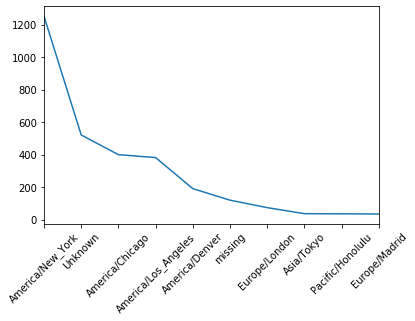

In [100]:
tzc=ctz.value_counts()
tzc[:10].plot(rot=45)

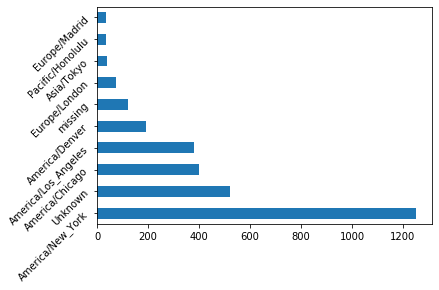

In [101]:
tzc[:10].plot(kind='barh',rot=45)

In [89]:
frame[frame['tz']=='Unknown']

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
7,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
8,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
9,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
28,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
29,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3512,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
3513,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
3531,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
3536,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown


In [110]:
frame['a']                # <- 사용하는 버전,브라우저의 종류
#운영체제 추출(정규식으로)
#frame.info()

#for x in frame.a:
frame.a.dropna() # <- 120개의 nan은 제외됨
res=[x.split()[0] for x in frame.a.dropna()]    #<- 브라우저 다음 띄어쓰기가 있어서 split으로 구분해주고 첫 번째거
#print(x)
res
#value_counts를 쓰기 위해 Series로 만들기
res=Series([x.split()[0] for x in frame.a.dropna()])
res.value_counts()[:10]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
BlackBerry8520/5.0.0.592       3
Dalvik/1.4.0                   3
dtype: int64

In [114]:
cframe=frame[frame.a.notnull()]   # <- null이 아닌 것들만

In [ ]:
myOs=
#cframe의 'a'컬럼에 Windows 단어가 있으면 Windows
#없으면 not Windows를 myOs에 저장

In [122]:
myOs=np.where(cframe.a.str.contains('Windows'),
         'Windows','Not Windows')
myOs

array(['Windows', 'Not Windows', 'Windows', ..., 'Not Windows',
       'Not Windows', 'Windows'], dtype='<U11')

In [125]:
#time_zone, myOs에 따른 그룹화
tzos=cframe.groupby(['tz',myOs])
tzos.size().unstack().fillna(0)

,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
...,...,...
Europe/Volgograd,0.0,1.0
Europe/Warsaw,1.0,15.0
Europe/Zurich,4.0,0.0
